In [208]:
import pandas as pd
import numpy as np
import os
import sys
sys.path.append("../python/")
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import math

In [209]:
with open(r'../../results/outcomes/Cost/Analyze result/ npv_cost.csv') as cost:
    df_cost=pd.read_csv(cost)
df_cost

,Strategy,lifecycle_infrastructure_el,environmental_restoration_el,safety_el,total_cost_el,lifecycle_infrastructure_br,environmental_restoration_br,safety_br,total_cost_br,total
0,S1,1390000.0,0.0000,1.661640e+05,1560000.0,2900000.0,0.0000,1.661640e+05,3060000.0,4620000.0
1,S2,1390000.0,0.0000,1.661640e+05,1560000.0,5460000.0,314891.7243,1.590000e+06,7370000.0,8930000.0
2,S3,1390000.0,0.0000,1.661640e+05,1560000.0,11400000.0,933516.8186,4.430000e+06,16700000.0,18300000.0
3,S4,4850000.0,314891.7243,1.590000e+06,6750000.0,2900000.0,0.0000,1.661640e+05,3060000.0,9810000.0
4,S5,1390000.0,0.0000,1.661640e+05,1560000.0,11400000.0,933516.8186,4.430000e+06,16700000.0,18300000.0
5,S6,11100000.0,314891.7243,1.590000e+06,13000000.0,3470000.0,314891.7243,1.590000e+06,5370000.0,18400000.0
6,S7,4850000.0,314891.7243,1.590000e+06,6750000.0,5460000.0,314891.7243,1.590000e+06,7370000.0,14100000.0
7,S8,11100000.0,314891.7243,1.590000e+06,13000000.0,3470000.0,314891.7243,1.590000e+06,5370000.0,18400000.0
8,S9,4850000.0,314891.7243,1.590000e+06,6750000.0,5460000.0,314891.7243,1.590000e+06,7370000.0,14100000.0
9,S10,32600000.0,933516.8186,4.430000e+06,38000000.0,5740000.0,933516.8186,4.430000e+06,11100000.0,49100000.0


In [210]:
df_cost = df_cost.set_index('Strategy')

In [211]:
df_cost=df_cost.drop(['total_cost_el', 'total_cost_br', 'total'], axis=1)

In [212]:
df_cost

,lifecycle_infrastructure_el,environmental_restoration_el,safety_el,lifecycle_infrastructure_br,environmental_restoration_br,safety_br
Strategy,,,,,,
S1,1390000.0,0.0000,1.661640e+05,2900000.0,0.0000,1.661640e+05
S2,1390000.0,0.0000,1.661640e+05,5460000.0,314891.7243,1.590000e+06
S3,1390000.0,0.0000,1.661640e+05,11400000.0,933516.8186,4.430000e+06
S4,4850000.0,314891.7243,1.590000e+06,2900000.0,0.0000,1.661640e+05
S5,1390000.0,0.0000,1.661640e+05,11400000.0,933516.8186,4.430000e+06
S6,11100000.0,314891.7243,1.590000e+06,3470000.0,314891.7243,1.590000e+06
S7,4850000.0,314891.7243,1.590000e+06,5460000.0,314891.7243,1.590000e+06
S8,11100000.0,314891.7243,1.590000e+06,3470000.0,314891.7243,1.590000e+06
S9,4850000.0,314891.7243,1.590000e+06,5460000.0,314891.7243,1.590000e+06


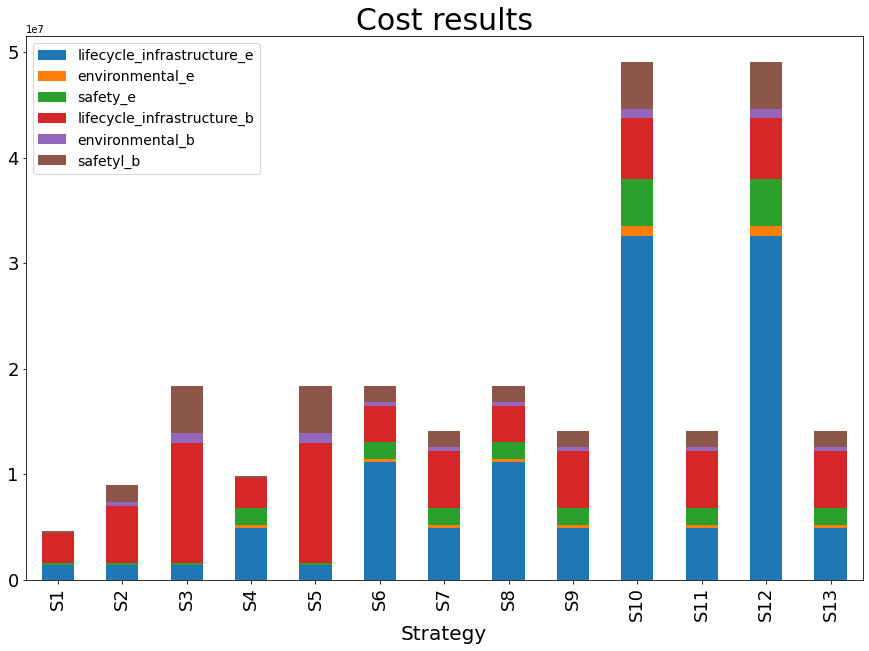

In [213]:
# plotting cost results
df_cost.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([0, 50000000])
plt.grid()
plt.title("Cost results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['lifecycle_infrastructure_e','environmental_e','safety_e','lifecycle_infrastructure_b', 'environmental_b','safetyl_b',], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-cost.png')

In [214]:
with open(r'../../results/outcomes/Benefit/Analyze result/ npv_benefit.csv') as loss_benefit:
    df_loss_benefit=pd.read_csv(loss_benefit)
df_loss_benefit

,Strategy,aesthetic_benefit_el,economic_losses_el,aesthetic_benefit_br,economic_loss_br
0,S1,0.000000,1.190000e+09,0.000000,2620000.0
1,S2,0.000000,1.190000e+09,1020.823948,1910000.0
2,S3,0.000000,1.190000e+09,2220.392903,1250000.0
3,S4,1020.823948,8.650000e+08,0.000000,2620000.0
4,S5,2220.392903,5.670000e+08,0.000000,2620000.0
5,S6,1020.823948,8.650000e+08,1020.823948,1910000.0
6,S7,1020.823948,8.650000e+08,1020.823948,1910000.0
7,S8,1020.823948,8.650000e+08,1020.823948,1910000.0
8,S9,1020.823948,8.650000e+08,1020.823948,1910000.0
9,S10,2220.392903,5.670000e+08,2220.392903,1250000.0


In [215]:
df_loss_benefit = df_loss_benefit.set_index('Strategy')

In [216]:
df_loss_benefit

,aesthetic_benefit_el,economic_losses_el,aesthetic_benefit_br,economic_loss_br
Strategy,,,,
S1,0.000000,1.190000e+09,0.000000,2620000.0
S2,0.000000,1.190000e+09,1020.823948,1910000.0
S3,0.000000,1.190000e+09,2220.392903,1250000.0
S4,1020.823948,8.650000e+08,0.000000,2620000.0
S5,2220.392903,5.670000e+08,0.000000,2620000.0
S6,1020.823948,8.650000e+08,1020.823948,1910000.0
S7,1020.823948,8.650000e+08,1020.823948,1910000.0
S8,1020.823948,8.650000e+08,1020.823948,1910000.0
S9,1020.823948,8.650000e+08,1020.823948,1910000.0


In [217]:
df_loss=df_loss_benefit.drop(['aesthetic_benefit_el', 'aesthetic_benefit_br'], axis=1)

In [218]:
df_loss

,economic_losses_el,economic_loss_br
Strategy,,
S1,1.190000e+09,2620000.0
S2,1.190000e+09,1910000.0
S3,1.190000e+09,1250000.0
S4,8.650000e+08,2620000.0
S5,5.670000e+08,2620000.0
S6,8.650000e+08,1910000.0
S7,8.650000e+08,1910000.0
S8,8.650000e+08,1910000.0
S9,8.650000e+08,1910000.0


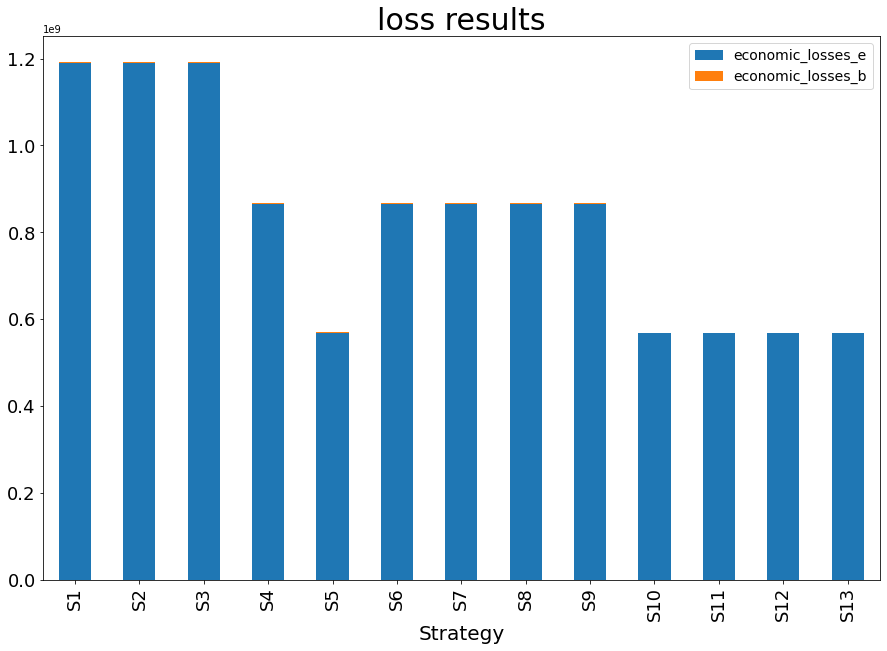

In [219]:
# plotting loss results
df_loss.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([0, 50000000])
plt.grid()
plt.title("loss results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['economic_losses_e','economic_losses_b'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-loss.png')

In [220]:
df_benefit=df_loss_benefit.drop(['economic_losses_el', 'economic_loss_br'], axis=1)

In [221]:
df_benefit

,aesthetic_benefit_el,aesthetic_benefit_br
Strategy,,
S1,0.000000,0.000000
S2,0.000000,1020.823948
S3,0.000000,2220.392903
S4,1020.823948,0.000000
S5,2220.392903,0.000000
S6,1020.823948,1020.823948
S7,1020.823948,1020.823948
S8,1020.823948,1020.823948
S9,1020.823948,1020.823948


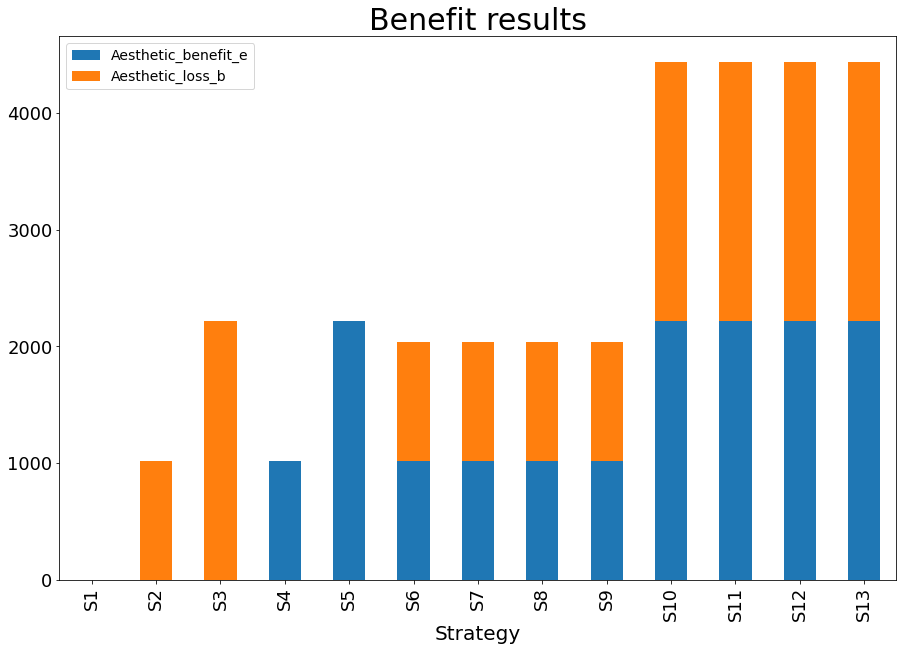

In [222]:
# plotting benefit results
df_benefit.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([0, 50000000])
plt.grid()
plt.title("Benefit results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['Aesthetic_benefit_e','Aesthetic_loss_b'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-benefit.png')

In [223]:
with open(r'../../results/outcomes/npv_cost_loss_benefit.csv') as npv_cost_loss_benefit:
    df_npv_cost_loss_benefit=pd.read_csv(npv_cost_loss_benefit)
df_npv_cost_loss_benefit

,Strategy,lifecycle_infrastructure cost,environmental_restoration cost,safety cost,economic_losses,aesthetic_benefit
0,S1,-4290000.0,0.000000e+00,-3.323280e+05,-1.190000e+09,0.000000
1,S2,-6850000.0,-3.148917e+05,-1.756164e+06,-1.190000e+09,1020.823948
2,S3,-12800000.0,-9.335168e+05,-4.596164e+06,-1.190000e+09,2220.392903
3,S4,-7750000.0,-3.148917e+05,-1.756164e+06,-8.680000e+08,1020.823948
4,S5,-12800000.0,-9.335168e+05,-4.596164e+06,-5.700000e+08,2220.392903
5,S6,-14600000.0,-6.297834e+05,-3.180000e+06,-8.670000e+08,2041.647896
6,S7,-10300000.0,-6.297834e+05,-3.180000e+06,-8.670000e+08,2041.647896
7,S8,-14600000.0,-6.297834e+05,-3.180000e+06,-8.670000e+08,2041.647896
8,S9,-10300000.0,-6.297834e+05,-3.180000e+06,-8.670000e+08,2041.647896
9,S10,-38300000.0,-1.867034e+06,-8.860000e+06,-5.680000e+08,4440.785806


In [224]:
df_npv_cost_loss_benefit = df_npv_cost_loss_benefit.set_index('Strategy')

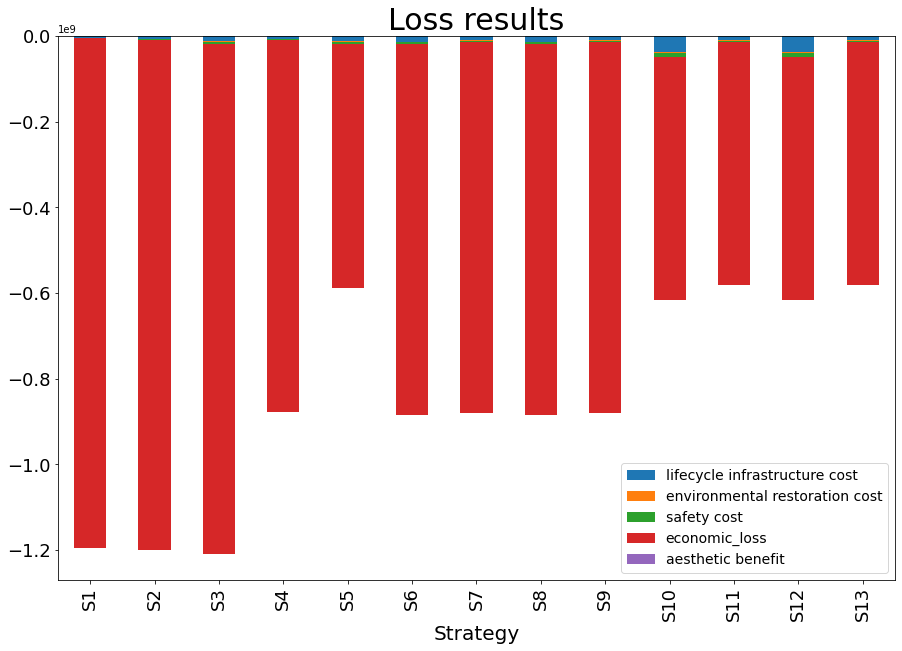

In [225]:
# plotting cost-loss-benefit results integerated for broadband and electric
df_npv_cost_loss_benefit.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([-12500000, 1250000000])
plt.grid()
plt.title("Loss results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['lifecycle infrastructure cost','environmental restoration cost','safety cost','economic_loss','aesthetic benefit'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-cost-loss-benefit-integrated.png')

In [226]:
df_npv_cost=df_npv_cost_loss_benefit.drop(['economic_losses', 'aesthetic_benefit'], axis=1)

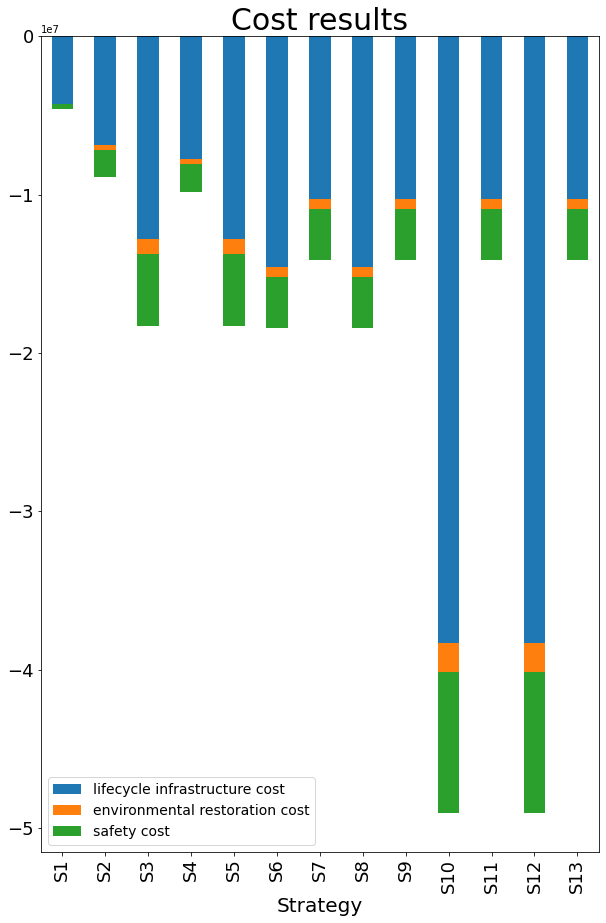

In [253]:
# plotting cost results integerated for broadband and electric
df_npv_cost.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
plt.title("Cost results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['lifecycle infrastructure cost','environmental restoration cost','safety cost'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-cost-integrated.png')

In [228]:
df_npv_loss=df_npv_cost_loss_benefit.drop(['lifecycle_infrastructure cost','environmental_restoration cost','safety cost', 'aesthetic_benefit'], axis=1)

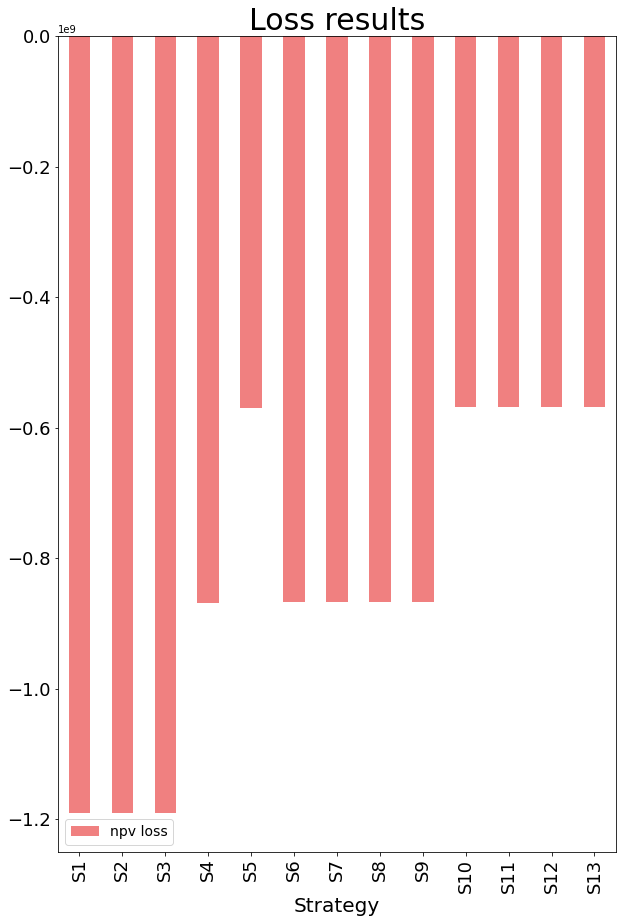

In [252]:
# plotting loss results integerated for broadband and electric
df_npv_loss.plot.bar(stacked=True, color='lightcoral')
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
plt.title("Loss results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['npv loss'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-loss-integrated.png')

In [230]:
df_npv_benefit=df_npv_cost_loss_benefit.drop(['lifecycle_infrastructure cost','environmental_restoration cost','safety cost', 'economic_losses'], axis=1)

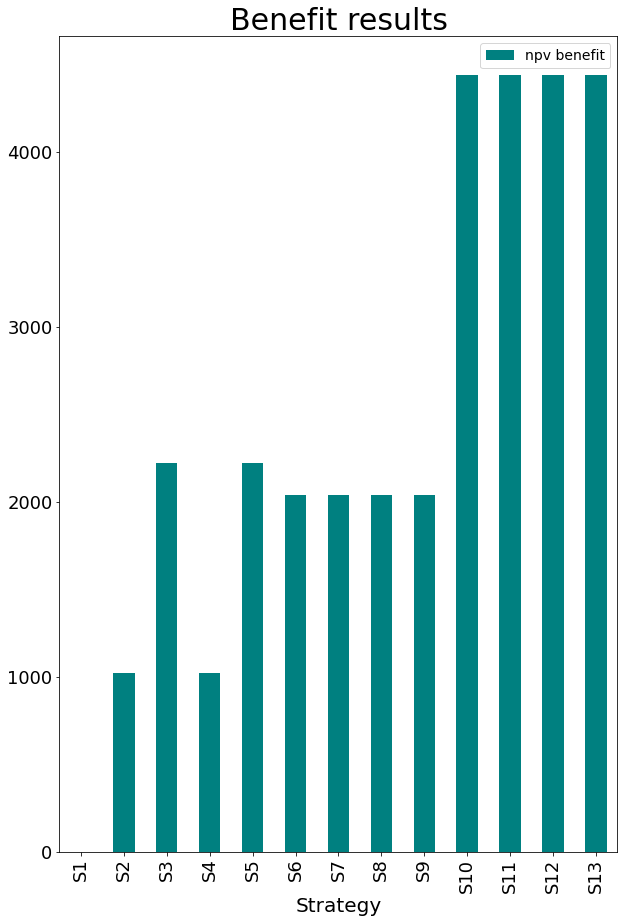

In [251]:
# plotting benefit results integerated for broadband and electric
df_npv_benefit.plot.bar(stacked=True, color='teal')
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
plt.title("Benefit results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['npv benefit'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-benefit-integrated.png')

In [232]:
with open(r'../../results/outcomes/npv_cost_loss_benefit_relative.csv') as npv_cost_loss_benefit_relative:
    df_npv_cost_loss_benefit_relative=pd.read_csv(npv_cost_loss_benefit_relative)
df_npv_cost_loss_benefit_relative

,Strategy,lifecycle_infrastructure cost,environmental_restoration cost,safety cost,economic_losses,aesthetic_benefit
0,S1,0.0,0.000000e+00,0.000,0.0,0.000000
1,S2,-2560000.0,-3.148917e+05,-1423836.001,0.0,1020.823948
2,S3,-8510000.0,-9.335168e+05,-4263836.001,0.0,2220.392903
3,S4,-3460000.0,-3.148917e+05,-1423836.001,322000000.0,1020.823948
4,S5,-8510000.0,-9.335168e+05,-4263836.001,620000000.0,2220.392903
5,S6,-10300000.0,-6.297834e+05,-2847672.002,323000000.0,2041.647896
6,S7,-6010000.0,-6.297834e+05,-2847672.002,323000000.0,2041.647896
7,S8,-10300000.0,-6.297834e+05,-2847672.002,323000000.0,2041.647896
8,S9,-6010000.0,-6.297834e+05,-2847672.002,323000000.0,2041.647896
9,S10,-34000000.0,-1.867034e+06,-8527672.002,622000000.0,4440.785806


In [233]:
df_npv_cost_loss_benefit_relative = df_npv_cost_loss_benefit_relative.set_index('Strategy')

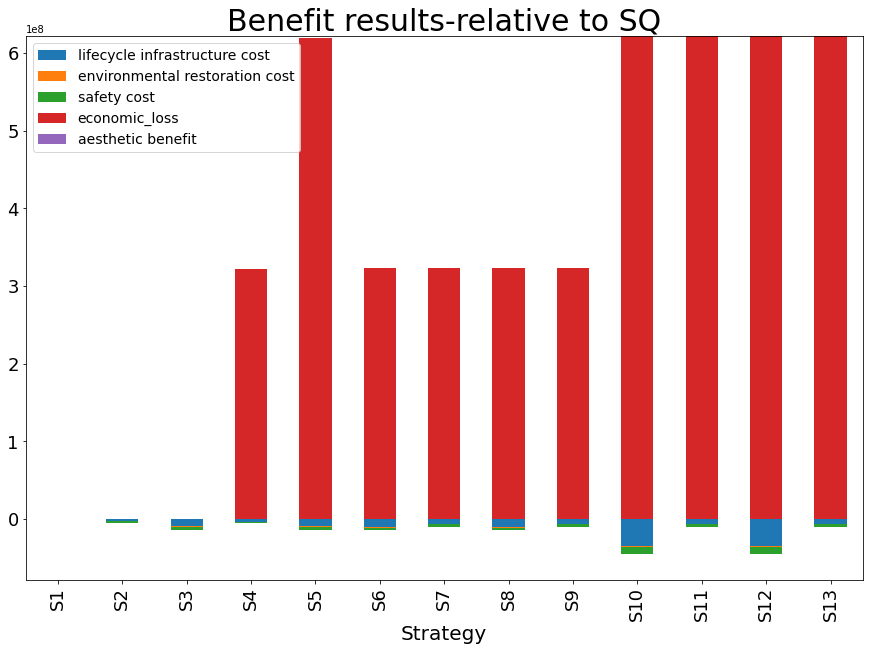

In [234]:
# plotting cost-loss-benefit results integerated for broadband and electric
df_npv_cost_loss_benefit_relative.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([-12500000, 1250000000])
plt.grid()
plt.title("Benefit results-relative to SQ", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['lifecycle infrastructure cost','environmental restoration cost','safety cost','economic_loss','aesthetic benefit'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-cost-loss-benefit-integrated-relative.png')

In [235]:
df_npv_cost_relative=df_npv_cost_loss_benefit_relative.drop(['economic_losses', 'aesthetic_benefit'], axis=1)

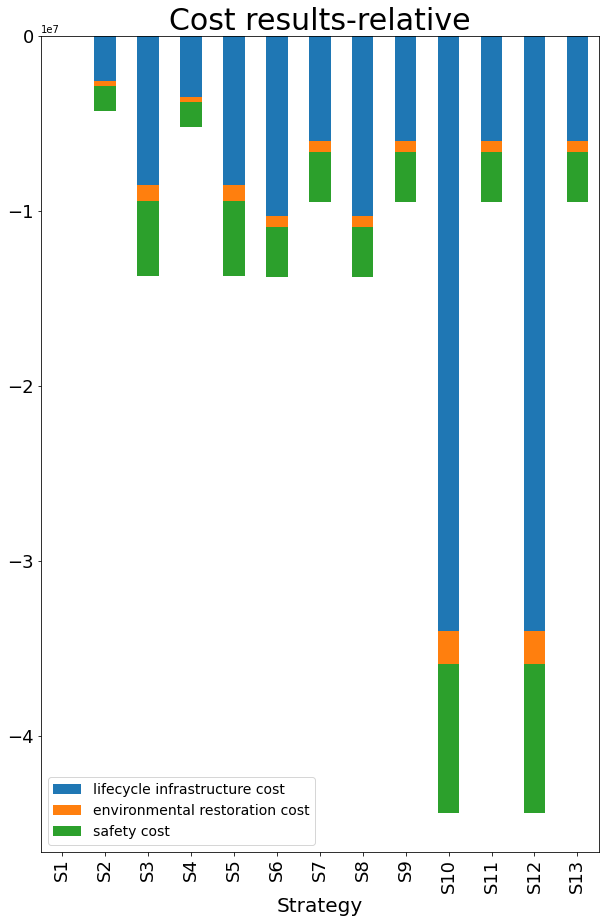

In [254]:
# plotting cost results integerated for broadband and electric
df_npv_cost_relative.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
plt.title("Cost results-relative", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['lifecycle infrastructure cost','environmental restoration cost','safety cost'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-cost-integrated-relative.png')

In [237]:
df_npv_loss_relative=df_npv_cost_loss_benefit_relative.drop(['lifecycle_infrastructure cost','environmental_restoration cost','safety cost', 'aesthetic_benefit'], axis=1)

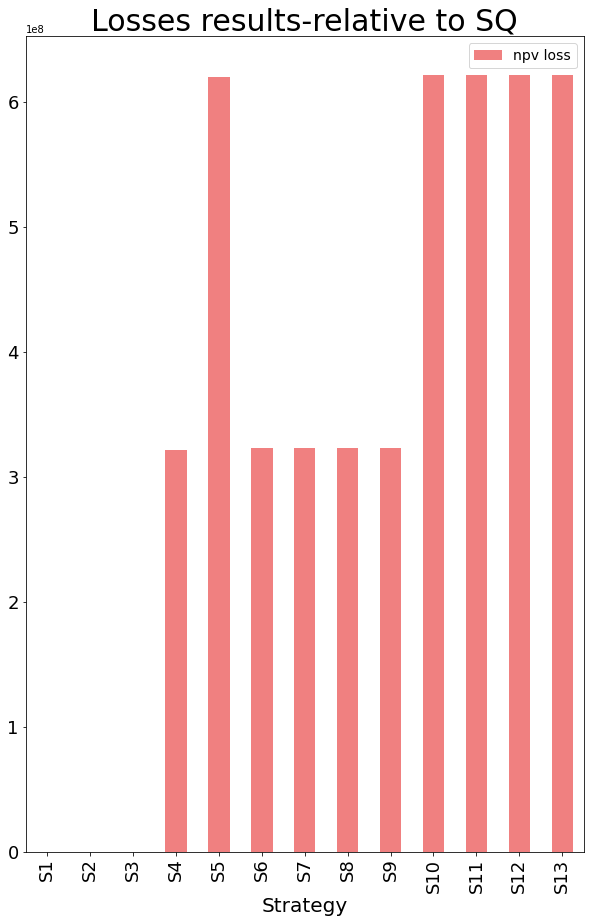

In [255]:
# plotting loss results integerated for broadband and electric
df_npv_loss_relative.plot.bar(stacked=True, color='lightcoral')
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
plt.title("Losses results-relative to SQ", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['npv loss'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-loss-integrated-relative.png')

In [239]:
df_npv_benefit_relative=df_npv_cost_loss_benefit_relative.drop(['lifecycle_infrastructure cost','environmental_restoration cost','safety cost', 'economic_losses'], axis=1)

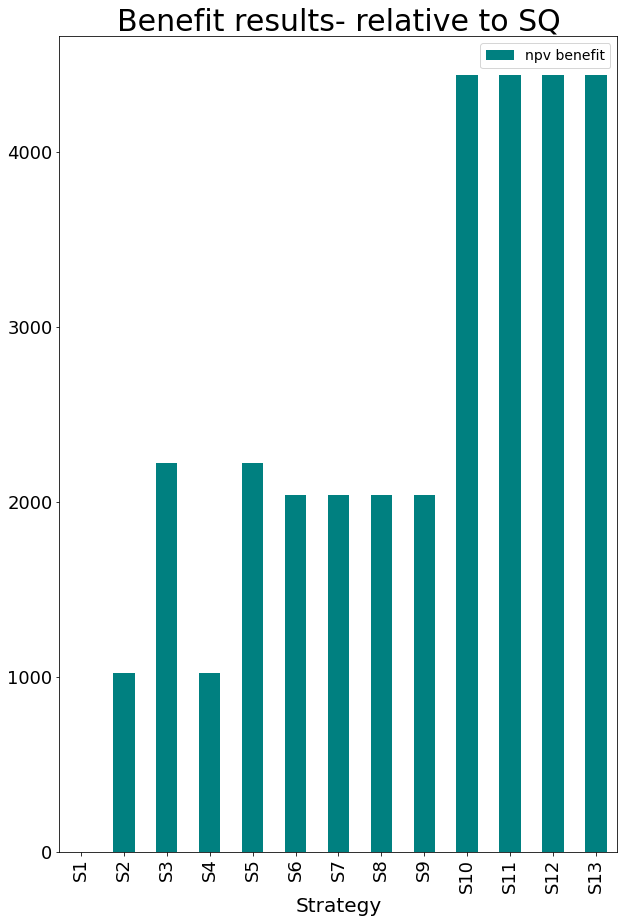

In [256]:
# plotting benefit results integerated for broadband and electric
df_npv_benefit_relative.plot.bar(stacked=True, color='teal')
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
plt.title("Benefit results- relative to SQ", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['npv benefit'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-benefit-integrated-relative.png')